In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv('heart.csv')
print(df.dtypes)
df.head()


age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = df.drop('output', axis=1)
y = pd.DataFrame(df['output'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_valid)

print(f'score: {accuracy_score(y_valid, preds)}')

score: 0.8021978021978022


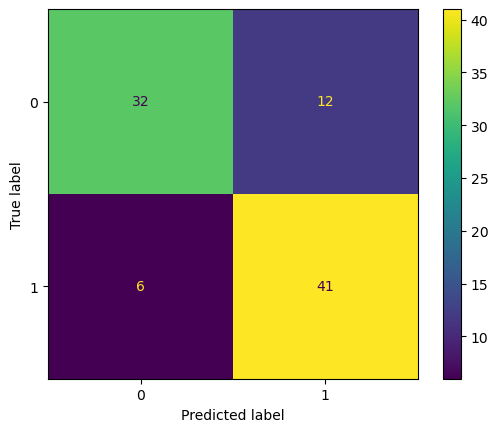

In [5]:
cm = confusion_matrix(y_valid, preds)
ConfusionMatrixDisplay(cm).plot()

In [6]:
from flask import Flask, jsonify, request
from pydantic import BaseModel, ValidationError

class Symptoms(BaseModel):
    age: int
    sex: int
    cp: int
    trtbps: int
    chol: int
    fbs: int
    restecg: int
    thalachh: int
    exng: int
    oldpeak: float
    slp: int
    caa: int
    thall: int

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        symptoms = Symptoms(**request.json)
        inputs = np.array(list(symptoms.model_dump().values())).reshape(1,-1)
        pred = model.predict(inputs)[0]
        response = {
            'prediction': int(pred)
        }

        return jsonify(response), 200

    except ValidationError as e:
        return jsonify(e.errors()), 400

if __name__ == '__main__':
    app.run()
    


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
[2024-10-08 12:54:53,942] ERROR in app: Exception on /predict [POST]
Traceback (most recent call last):
  File "/home/uz/anaconda3/envs/gcash/lib/python3.12/site-packages/flask/app.py", line 1473, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/uz/anaconda3/envs/gcash/lib/python3.12/site-packages/flask/app.py", line 882, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/uz/anaconda3/envs/gcash/lib/python3.12/site-packages/flask/app.py", line 880, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/uz/anaconda3/envs/gcash/lib/python3.12/site-packages/flask/app.py", line 865, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^